## Assignment - 04
> Aim : With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.

Name : Kanaka Amin | Class : TE-AI&DS | Roll No : 32501

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RED : [-1]  | BLUE : [-2]


Learned weights:  [-3.  1.]
Learned biases:  1.0000000000000888
--------------------------------------------------
[1 1] -> Predicted : -1.0, Actual : -1 
[-1  1] -> Predicted : 1.0, Actual : 1 
[-1 -1] -> Predicted : 1.0, Actual : 1 
[ 1 -1] -> Predicted : -1.0, Actual : -1 
--------------------------------------------------
Test data point [-2  2] -> Predicted label: 1.0


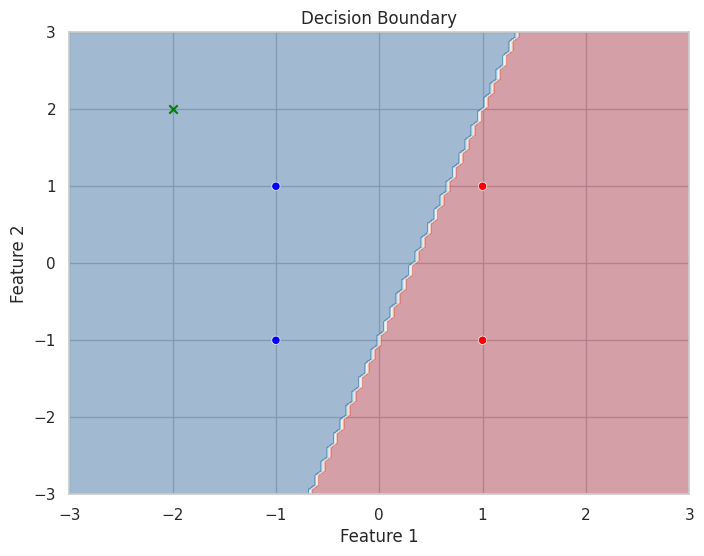

In [2]:
#perceptron class -

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights) + self.bias

        #applying sign function to the summation
        return np.sign(weighted_sum)

    def train(self, x, y, lr, epochs):
        for epoch in range(epochs):
            for input,label in zip(x, y):
                #predict and then check the error later
                prediction = self.predict(input)
                self.weights += lr + (label - prediction) * input
                self.bias +=  lr + (label - prediction)

#main
data = np.array([
    [1, 1],  # Red point
    [-1, 1],  # Blue point
    [-1, -1],  # Blue point
    [1, -1],   # Red point
])
labels = np.array([-1, 1, 1, -1])  # Red: -1, Blue: 1
print("RED : [-1]  | BLUE : [-2]")
print("\n")
pp = Perceptron(input_size= data.shape[1])  #formed a object

#train the perceptron
pp.train(data, labels, lr =0.1, epochs= 1000)

#learned weights and biases
print("Learned weights: ", pp.weights)
print("Learned biases: ", pp.bias)
print('-'*50)

#testing the perceptron on the trained data
for i in range(len(data)):
    predicted_op = pp.predict(data[i])
    print(f"{data[i]} -> Predicted : {predicted_op}, Actual : {labels[i]} ")

#testing the perceptron on test data
data_test = np.array([-2, 2])
pred_op = pp.predict(data_test)
print('-'*50)
print(f"Test data point {data_test} -> Predicted label: {pred_op}")

#visualization
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = pp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.4)
sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, palette=["red", "blue"], legend=False)
plt.scatter(data_test[0], data_test[1], color='green', marker='x', label='Test Data')
plt.xlim(-3, 3)  # Adjust x-axis limits
plt.ylim(-3, 3)  # Adjust y-axis limits
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()